## Overview

Using the [Possum Regression Dataset](https://www.kaggle.com/datasets/abrambeyer/openintro-possum), create a linear regression model to predict a possum's head length based on its total body length.

In [54]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [21]:
# read in data and perform EDA
possums = pd.read_csv('possum.csv')

possums.info()

print("\n first 5 records:\n", possums.head())

print("\n shape:\n", possums.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB

 first 5 records:
    case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5 

### Total length to predict a possum's head length

In [32]:
# select columns
possum_df = possums[['totlngth','hdlngth']]
possum_df.head()

,totlngth,hdlngth
0,89.0,94.1
1,91.5,92.5
2,95.5,94.0
3,92.0,93.2
4,85.5,91.5


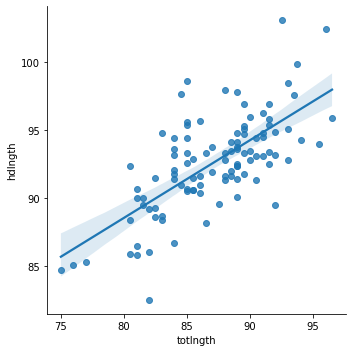

In [33]:
# display scatterplot with regression line to show correlation between two variables
sns.lmplot(x='totlngth',y='hdlngth',data=possum_df)

In [36]:
# drop any row with null values 
# NOTE: it's not always the best method to drop a record where any column contains a null value, but since there is only one
#independent and one dependent variable, the model's accuracy could be affected by any number of null values
print("initial df length:\n", possum_df.count())
possum_df=possum_df.dropna()
print("df length after removing null vals:\n", possum_df.count())

initial df length:
 totlngth    104
hdlngth     104
dtype: int64
df length after removing null vals:
 totlngth    104
hdlngth     104
dtype: int64


In [40]:
# select independent (X) and dependent (y) variable
X = np.array(possum_df['totlngth']).reshape(-1,1)
y = np.array(possum_df['hdlngth']).reshape(-1,1)

In [41]:
# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Why do we need to split our data into testing and training datasets?

This [video](https://learn.microsoft.com/en-us/shows/dev-intro-to-data-science/why-do-you-split-data-into-testing-and-training-data-in-data-science-12-of-28) explains it. 

In [45]:
# initialize LinReg object
regr = LinearRegression()

# fit model 
regr.fit(X_train, y_train)

# return coefficient of determination (R^2)
print(round(regr.score(X_test,y_test), 4))

0.5928


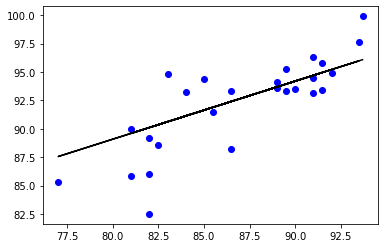

In [53]:
# predict head length
y_pred = regr.predict(X_test)

#explore results
plt.scatter(X_test, y_test, color='b')
plt.plot(X_test,y_pred,color='k')
plt.show()

In [56]:
# evaluate model with mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

1.9258983527681415
